# Task 0

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy

In [2]:
def initialize(X, k):
    """
    Initializes cluster centroids for K-means.

    Parameters:
    X (numpy.ndarray): The dataset that will be used for K-means clustering. Shape (n, d).
    k (int): The number of clusters.

    Returns:
    numpy.ndarray: The initialized centroids for each cluster. Shape (k, d).
    """
    if not isinstance(X, np.ndarray) or len(X.shape) != 2:
        return None
    if not isinstance(k, int) or k <= 0 or X.shape[0] < k:
        return None

    n, d = X.shape

    min_vals = X.min(axis=0)
    max_vals = X.max(axis=0)

    centroids = np.random.uniform(min_vals, max_vals, (k, d))

    return centroids

## Task 0 - Main File

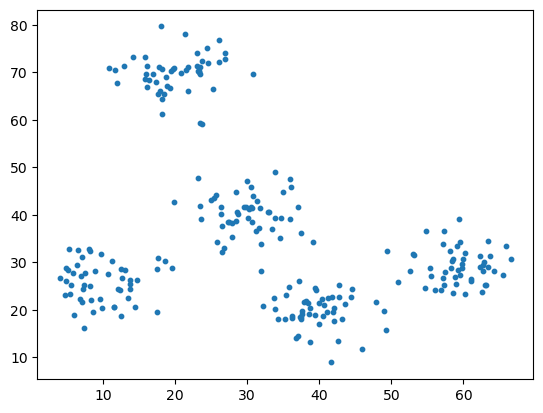

[[14.54730144 13.46780434]
 [20.57098466 33.55245039]
 [ 9.55556506 51.51143281]
 [48.72458008 20.03154959]
 [25.43826106 60.35542243]]


In [3]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)
a = np.random.multivariate_normal([30, 40], [[16, 0], [0, 16]], size=50)
b = np.random.multivariate_normal([10, 25], [[16, 0], [0, 16]], size=50)
c = np.random.multivariate_normal([40, 20], [[16, 0], [0, 16]], size=50)
d = np.random.multivariate_normal([60, 30], [[16, 0], [0, 16]], size=50)
e = np.random.multivariate_normal([20, 70], [[16, 0], [0, 16]], size=50)
X = np.concatenate((a, b, c, d, e), axis=0)
np.random.shuffle(X)
plt.scatter(X[:, 0], X[:, 1], s=10)
plt.show()
print(initialize(X, 5))

In [6]:
def kmeans(X, k, iterations=1000):
    """
    Performs K-means on a dataset.

    Parameters:
    X (numpy.ndarray): The dataset. Shape (n, d).
    k (int): The number of clusters.
    iterations (int): The maximum number of iterations that should be performed.

    Returns:
    tuple: (C, clss)
        C is a numpy.ndarray of shape (k, d) containing the centroid means for each cluster.
        clss is a numpy.ndarray of shape (n,) containing the index of the cluster in C that each data point belongs to.
    """
    if not isinstance(X, np.ndarray) or len(X.shape) != 2:
        return None, None
    if not isinstance(k, int) or k <= 0 or X.shape[0] < k:
        return None, None
    if not isinstance(iterations, int) or iterations <= 0:
        return None, None

    Cs = initialize(X, k)
    clss = np.argmin(np.linalg.norm(X[:, np.newaxis] - Cs, axis=2), axis=1)
    for i in range(iterations):
        Cs_copy = Cs.copy()
        for i in range(len(Cs)):
            if len(X[clss == i] > 0):
                Cs_copy[i] = np.mean(X[clss == i], axis=0)
            else:
                Cs_copy[i] = initialize(X, 1)
        clss = np.argmin(np.linalg.norm(X[:, np.newaxis] - Cs_copy, axis=2),
                         axis=1)
        if np.array_equal(Cs, Cs_copy):
            break
        Cs = Cs_copy
    return Cs, clss


[[ 9.92511389 25.73098987]
 [30.06722465 40.41123947]
 [39.62770705 19.89843487]
 [59.22766628 29.19796006]
 [20.0835633  69.81592298]]


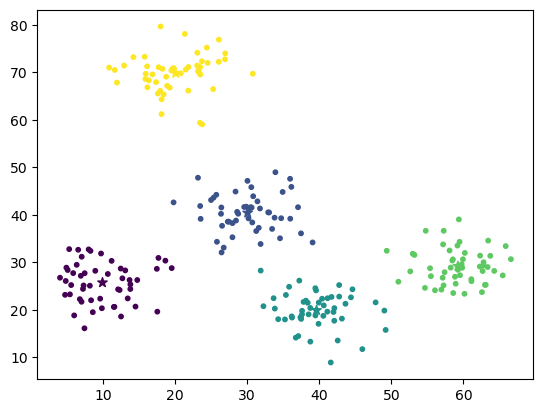

In [7]:
if __name__ == "__main__":
    np.random.seed(0)
    a = np.random.multivariate_normal([30, 40], [[16, 0], [0, 16]], size=50)
    b = np.random.multivariate_normal([10, 25], [[16, 0], [0, 16]], size=50)
    c = np.random.multivariate_normal([40, 20], [[16, 0], [0, 16]], size=50)
    d = np.random.multivariate_normal([60, 30], [[16, 0], [0, 16]], size=50)
    e = np.random.multivariate_normal([20, 70], [[16, 0], [0, 16]], size=50)
    X = np.concatenate((a, b, c, d, e), axis=0)
    np.random.shuffle(X)
    C, clss = kmeans(X, 5)
    print(C)
    plt.scatter(X[:, 0], X[:, 1], s=10, c=clss)
    plt.scatter(C[:, 0], C[:, 1], s=50, marker='*', c=list(range(5)))
    plt.show()

# Task 2

In [10]:
def variance(X, C):
    """
    Calculates the total intra-cluster variance for a data set.

    Parameters:
    X (numpy.ndarray): The data set. Shape (n, d).
    C (numpy.ndarray): The centroid means for each cluster. Shape (k, d).

    Returns:
    float: The total variance.
    """
    if not isinstance(X, np.ndarray) or len(X.shape) != 2:
        return None
    if not isinstance(C, np.ndarray) or len(C.shape) != 2:
        return None

    try:
        dist = np.sqrt(((X - C[:, np.newaxis])**2).sum(axis=-1))
        min_dist = np.min(dist, axis=0)

        var = np.sum(min_dist ** 2)

        return var
    except Exception:
        return None

In [12]:
if __name__ == "__main__":
    np.random.seed(0)
    a = np.random.multivariate_normal([30, 40], [[16, 0], [0, 16]], size=50)
    b = np.random.multivariate_normal([10, 25], [[16, 0], [0, 16]], size=50)
    c = np.random.multivariate_normal([40, 20], [[16, 0], [0, 16]], size=50)
    d = np.random.multivariate_normal([60, 30], [[16, 0], [0, 16]], size=50)
    e = np.random.multivariate_normal([20, 70], [[16, 0], [0, 16]], size=50)
    X = np.concatenate((a, b, c, d, e), axis=0)
    np.random.shuffle(X)

    for k in range(1, 11):
        C, _ = kmeans(X, k)
        print('Variance with {} clusters: {}'.format(k, variance(X, C).round(5)))

Variance with 1 clusters: 157927.7052
Variance with 2 clusters: 82095.68297
Variance with 3 clusters: 34784.23723
Variance with 4 clusters: 23158.40095
Variance with 5 clusters: 7868.52123
Variance with 6 clusters: 7406.93077
Variance with 7 clusters: 6930.66361
Variance with 8 clusters: 6162.15884
Variance with 9 clusters: 5843.92455
Variance with 10 clusters: 5727.41124


# Task 3:

In [17]:
def optimum_k(X, kmin=1, kmax=None, iterations=1000):
    """
    Tests for the optimum number of clusters by variance.

    Parameters:
    X (numpy.ndarray): The data set. Shape (n, d).
    kmin (int): The minimum number of clusters to check for (inclusive).
    kmax (int): The maximum number of clusters to check for (inclusive).
    iterations (int): The maximum number of iterations for K-means.

    Returns:
    tuple: (results, d_vars)
        results is a list containing the outputs of K-means for each cluster size.
        d_vars is a list containing the difference in variance from the smallest cluster size for each cluster size.
    """
    if type(X) is not np.ndarray or X.ndim != 2:
        return None, None
    if type(kmin) is not int or kmin < 1:
        return None, None
    if kmax is None:
        kmax = X.shape[0]
    if type(kmax) is not int or kmax <= 0 or kmin >= kmax:
        return None, None
    if type(iterations) is not int or iterations < 1:
        return None, None

    # Create empty lists
    results = []
    vars = []
    d_vars = []

    # Calculate kmeans and variance through range of kmin to kmax
    for k in range(kmin, kmax + 1):
        C, clss = kmeans(X, k, iterations)
        results.append((C, clss))
        vars.append(variance(X, C))

    # Calculate d_vars from the smallest cluster size 4 each cluster
    for var in vars:
        d_vars.append(vars[0] - var)

    return results, d_vars


[(array([[31.78625503, 37.01090945]]), array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0])), (array([[34.76990289, 28.71421162],
       [20.14417812, 69.38429903]]), array([0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,

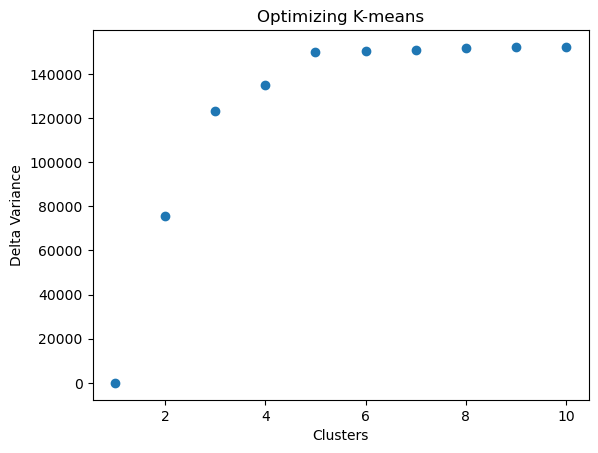

In [18]:
if __name__ == "__main__":
    np.random.seed(0)
    a = np.random.multivariate_normal([30, 40], [[16, 0], [0, 16]], size=50)
    b = np.random.multivariate_normal([10, 25], [[16, 0], [0, 16]], size=50)
    c = np.random.multivariate_normal([40, 20], [[16, 0], [0, 16]], size=50)
    d = np.random.multivariate_normal([60, 30], [[16, 0], [0, 16]], size=50)
    e = np.random.multivariate_normal([20, 70], [[16, 0], [0, 16]], size=50)
    X = np.concatenate((a, b, c, d, e), axis=0)
    np.random.shuffle(X)

    results, d_vars = optimum_k(X, kmax=10)
    print(results)
    print(np.round(d_vars, 5))
    plt.scatter(list(range(1, 11)), d_vars)
    plt.xlabel('Clusters')
    plt.ylabel('Delta Variance')
    plt.title('Optimizing K-means')
    plt.show()

# Task 4:

In [19]:
def initialize(X, k):
    """
    Initializes variables for a Gaussian Mixture Model.

    Parameters:
    X (numpy.ndarray): The data set. Shape (n, d).
    k (int): The number of clusters.

    Returns:
    tuple: (pi, m, S)
        pi is a numpy.ndarray of shape (k,) containing the priors for each cluster, initialized evenly.
        m is a numpy.ndarray of shape (k, d) containing the centroid means for each cluster, initialized with K-means.
        S is a numpy.ndarray of shape (k, d, d) containing the covariance matrices for each cluster, initialized as identity matrices.
    """
    if not isinstance(X, np.ndarray) or len(X.shape) != 2:
        return None, None, None
    if not isinstance(k, int) or k <= 0 or X.shape[0] < k:
        return None, None, None

    n, d = X.shape

    pi = np.full((k,), 1 / k)

    m, _ = kmeans(X, k)

    S = np.full((k, d, d), np.identity(d))

    return pi, m, S

In [ ]:
if __name__ == '__main__':
    np.random.seed(11)
    a = np.random.multivariate_normal([30, 40], [[75, 5], [5, 75]], size=10000)
    b = np.random.multivariate_normal([5, 25], [[16, 10], [10, 16]], size=750)
    c = np.random.multivariate_normal([60, 30], [[16, 0], [0, 16]], size=750)
    d = np.random.multivariate_normal(
        [20, 70], [[35, 10], [10, 35]], size=1000)
    X = np.concatenate((a, b, c, d), axis=0)
    np.random.shuffle(X)
    pi, m, S = initialize(X, 4)
    print(pi)
    print(m)
    print(S)

# Task 5

In [25]:
def pdf(X, m, S):
    """
    Calculates the probability density function of a Gaussian distribution.

    Parameters:
    X (numpy.ndarray): The data points whose PDF should be evaluated. Shape (n, d).
    m (numpy.ndarray): The mean of the distribution. Shape (d,).
    S (numpy.ndarray): The covariance of the distribution. Shape (d, d).

    Returns:
    numpy.ndarray: The PDF values for each data point. Shape (n,).
    """
    if type(X) is not np.ndarray or len(X.shape) != 2:
        return None
    if type(m) is not np.ndarray or len(m.shape) != 1:
        return None
    if type(S) is not np.ndarray or len(S.shape) != 2:
        return None
    if X.shape[1] != m.shape[0]:
        return None
    if S.shape[0] != S.shape[1]:
        return None
    if m.shape[0] != S.shape[0]:
        return None

    _, dimensions = X.shape

    # Calculate the inverse and determinant of the covariance matrix
    inv_covariance = np.linalg.inv(S)
    det_covariance = np.linalg.det(S)

    if det_covariance <= 0:
        return None

    X_minus_mean = X - m

    # Calculate the exponent of the PDF formula
    exponent = -0.5 * np.sum(X_minus_mean @
                             inv_covariance * X_minus_mean, axis=1)
    # Calculate the coefficient of the PDF formula
    coeff = 1 / np.sqrt((2 * np.pi) ** dimensions * det_covariance)

    # Calculate the PDF values, and set mins to 1e-300
    pdf_values = coeff * np.exp(exponent)
    pdf_values = np.maximum(pdf_values, 1e-300)

    return pdf_values


In [26]:
if __name__ == '__main__':
    np.random.seed(0)
    m = np.array([12, 30, 10])
    S = np.array([[36, -30, 15], [-30, 100, -20], [15, -20, 25]])
    X = np.random.multivariate_normal(m, S, 10000)
    P = pdf(X, m, S)
    print(P)

[3.47450910e-05 2.53649178e-06 1.80348301e-04 ... 1.24604061e-04
 1.86345129e-04 2.59397003e-05]


# Task 6:

In [34]:
def expectation(X, pi, m, S):
    """
    Calculates the expectation step in the EM algorithm for a GMM.

    Parameters:
    X (numpy.ndarray): The data set. Shape (n, d).
    pi (numpy.ndarray): The priors for each cluster. Shape (k,).
    m (numpy.ndarray): The centroid means for each cluster. Shape (k, d).
    S (numpy.ndarray): The covariance matrices for each cluster. Shape (k, d, d).

    Returns:
    tuple: (g, l)
        g is a numpy.ndarray of shape (k, n) containing the posterior probabilities for each data point in each cluster.
        l is the total log likelihood.
    """
    if type(X) is not np.ndarray or len(X.shape) != 2:
        return None, None
    if type(pi) is not np.ndarray or len(pi.shape) != 1:
        return None, None
    if type(m) is not np.ndarray or len(m.shape) != 2:
        return None, None
    if type(S) is not np.ndarray or len(S.shape) != 3:
        return None, None
    if X.shape[1] != m.shape[1] or m.shape[1] != S.shape[1]:
        return None, None
    if S.shape[1] != S.shape[2]:
        return None, None
    if pi.shape[0] != m.shape[0] or m.shape[0] != S.shape[0]:
        return None, None
    if False in [np.isclose(pi.sum(), 1)]:
        return None, None

    n, d = X.shape
    k = pi.shape[0]

    g = np.zeros((k, n))

    for i in range(k):
        P = pdf(X, m[i], S[i])
        g[i] = pi[i] * P

    g_sum = np.sum(g, axis=0)
    g /= g_sum

    r = np.sum(np.log(g_sum))

    return g, r


In [35]:
if __name__ == '__main__':
    np.random.seed(11)
    a = np.random.multivariate_normal([30, 40], [[75, 5], [5, 75]], size=10000)
    b = np.random.multivariate_normal([5, 25], [[16, 10], [10, 16]], size=750)
    c = np.random.multivariate_normal([60, 30], [[16, 0], [0, 16]], size=750)
    d = np.random.multivariate_normal(
        [20, 70], [[35, 10], [10, 35]], size=1000)
    X = np.concatenate((a, b, c, d), axis=0)
    np.random.shuffle(X)
    pi, m, S = initialize(X, 4)
    g, l = expectation(X, pi, m, S)
    print(g)
    print(np.sum(g, axis=0))
    print(l)

RecursionError: maximum recursion depth exceeded

# Task 7

In [ ]:
def maximization(X, g):
    """
    Calculates the maximization step in the EM algorithm for a GMM.

    Parameters:
    X (numpy.ndarray): The data set. Shape (n, d).
    g (numpy.ndarray): The posterior probabilities for each data point in each cluster. Shape (k, n).

    Returns:
    tuple: (pi, m, S)
        pi is a numpy.ndarray of shape (k,) containing the updated priors for each cluster.
        m is a numpy.ndarray of shape (k, d) containing the updated centroid means for each cluster.
        S is a numpy.ndarray of shape (k, d, d) containing the updated covariance matrices for each cluster.
    """
    if not isinstance(X, np.ndarray) or len(X.shape) != 2:
        return None, None, None
    if not isinstance(g, np.ndarray) or len(g.shape) != 2:
        return None, None, None

    n, d = X.shape
    k = g.shape[0]

    pi = np.sum(g, axis=1) / n

    m = np.dot(g, X) / np.sum(g, axis=1, keepdims=True)

    S = np.zeros((k, d, d))
    for i in range(k):
        X_m = X - m[i]
        S[i] = np.dot(g[i] * X_m.T, X_m) / np.sum(g[i])

    return pi, m, S


In [ ]:
import numpy as np

if __name__ == '__main__':
    np.random.seed(11)
    a = np.random.multivariate_normal([30, 40], [[75, 5], [5, 75]], size=10000)
    b = np.random.multivariate_normal([5, 25], [[16, 10], [10, 16]], size=750)
    c = np.random.multivariate_normal([60, 30], [[16, 0], [0, 16]], size=750)
    d = np.random.multivariate_normal(
        [20, 70], [[35, 10], [10, 35]], size=1000)
    X = np.concatenate((a, b, c, d), axis=0)
    np.random.shuffle(X)
    pi, m, S = initialize(X, 4)
    g, _ = expectation(X, pi, m, S)
    pi, m, S = maximization(X, g)
    print(pi)
    print(m)
    print(S)

# Task 8

In [ ]:
def expectation_maximization(X, k, iterations=1000, tol=1e-5, verbose=False):

    # Initialize variables
    pi, m, S = initialize(X, k)
    g, _ = expectation(X, pi, m, S)
    l_prev = 0

    # Perform EM algorithm
    for i in range(iterations):
        pi, m, S = maximization(X, g)
        g, l = expectation(X, pi, m, S)

        # Check for verbose
        if verbose and (i % 10 == 0 or i == iterations - 1):
            print('Log Likelihood after {} iterations: {}'.format(i, round(l, 5)))

        # Check for early stopping
        if abs(l - l_prev) <= tol:
            break
        l_prev = l

    return pi, m, S, g, l

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


if __name__ == '__main__':
    np.random.seed(11)
    a = np.random.multivariate_normal([30, 40], [[75, 5], [5, 75]], size=10000)
    b = np.random.multivariate_normal([5, 25], [[16, 10], [10, 16]], size=750)
    c = np.random.multivariate_normal([60, 30], [[16, 0], [0, 16]], size=750)
    d = np.random.multivariate_normal(
        [20, 70], [[35, 10], [10, 35]], size=1000)
    X = np.concatenate((a, b, c, d), axis=0)
    np.random.shuffle(X)
    k = 4
    pi, m, S, g, l = expectation_maximization(X, k, 150, verbose=True)
    clss = np.sum(g * np.arange(k).reshape(k, 1), axis=0)
    plt.scatter(X[:, 0], X[:, 1], s=20, c=clss)
    plt.scatter(m[:, 0], m[:, 1], s=50, c=np.arange(k), marker='*')
    plt.show()
    print(X.shape[0] * pi)
    print(m)
    print(S)
    print(l)


# Task 9:

In [ ]:
def BIC(X, kmin=1, kmax=None, iterations=1000, tol=1e-5, verbose=False):

    # Initialize variables
    if kmax is None:
        kmax = X.shape[0]
    l = np.empty(kmax - kmin + 1)
    b = np.empty_like(l)
    best_result = None
    best_k = None
    best_bic = float('-inf')

    # Perform EM algorithm for each k
    for k in range(kmin, kmax + 1):
        pi, m, S, g, log_likelihood = expectation_maximization(
            X, k, iterations, tol, verbose)
        p = k * (X.shape[1] * (X.shape[1] + 1) / 2 + X.shape[1] + 1)
        bic = p * np.log(X.shape[0]) - 2 * log_likelihood
        l[k - kmin] = log_likelihood
        b[k - kmin] = bic
        if bic > best_bic:
            best_bic = bic
            best_k = k
            best_result = (pi, m, S)

    return best_k, best_result, l, b

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

if __name__ == '__main__':
    np.random.seed(11)
    a = np.random.multivariate_normal([30, 40], [[75, 5], [5, 75]], size=10000)
    b = np.random.multivariate_normal([5, 25], [[16, 10], [10, 16]], size=750)
    c = np.random.multivariate_normal([60, 30], [[16, 0], [0, 16]], size=750)
    d = np.random.multivariate_normal(
        [20, 70], [[35, 10], [10, 35]], size=1000)
    X = np.concatenate((a, b, c, d), axis=0)
    np.random.shuffle(X)
    best_k, best_result, l, b = BIC(X, kmin=1, kmax=10)
    print(best_k)
    print(best_result)
    print(l)
    print(b)
    x = np.arange(1, 11)
    plt.plot(x, l, 'r')
    plt.xlabel('Clusters')
    plt.ylabel('Log Likelihood')
    plt.tight_layout()
    plt.show()
    plt.plot(x, b, 'b')
    plt.xlabel('Clusters')
    plt.ylabel('BIC')
    plt.tight_layout()
    plt.show()

# Task 10:

In [ ]:
def kmeans(X, k):
    # Import necessary functions
    from sklearn.cluster import KMeans

    # Perform K-means clustering
    kmeans = KMeans(n_clusters=k).fit(X)

    # Get cluster centroids and labels
    C = kmeans.cluster_centers_
    clss = kmeans.labels_

    return C, clss

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


if __name__ == "__main__":
    np.random.seed(0)
    a = np.random.multivariate_normal([30, 40], [[16, 0], [0, 16]], size=50)
    b = np.random.multivariate_normal([10, 25], [[16, 0], [0, 16]], size=50)
    c = np.random.multivariate_normal([40, 20], [[16, 0], [0, 16]], size=50)
    d = np.random.multivariate_normal([60, 30], [[16, 0], [0, 16]], size=50)
    e = np.random.multivariate_normal([20, 70], [[16, 0], [0, 16]], size=50)
    X = np.concatenate((a, b, c, d, e), axis=0)
    np.random.shuffle(X)

    C, clss = kmeans(X, 5)
    print(C)
    plt.scatter(X[:, 0], X[:, 1], s=10, c=clss)
    plt.scatter(C[:, 0], C[:, 1], s=50, marker='*', c=list(range(5)))
    plt.show()


# Task 11:

In [ ]:
def gmm(X, k):
    # Import necessary functions
    from sklearn.mixture import GaussianMixture

    # Perform GMM clustering
    gmm = GaussianMixture(n_components=k).fit(X)

    # Get cluster parameters and labels
    pi = gmm.weights_
    m = gmm.means_
    S = gmm.covariances_
    clss = gmm.predict(X)
    bic = gmm.bic(X)

    return pi, m, S, clss, bic

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


if __name__ == '__main__':
    np.random.seed(11)
    a = np.random.multivariate_normal([30, 40], [[75, 5], [5, 75]], size=10000)
    b = np.random.multivariate_normal([5, 25], [[16, 10], [10, 16]], size=750)
    c = np.random.multivariate_normal([60, 30], [[16, 0], [0, 16]], size=750)
    d = np.random.multivariate_normal(
        [20, 70], [[35, 10], [10, 35]], size=1000)
    X = np.concatenate((a, b, c, d), axis=0)
    np.random.shuffle(X)

    pi, m, S, clss, bic = gmm(X, 4)
    print(pi)
    print(m)
    print(S)
    print(bic)
    plt.scatter(X[:, 0], X[:, 1], s=10, c=clss)
    plt.scatter(m[:, 0], m[:, 1], s=50, marker='*', c=list(range(4)))
    plt.show()


# Task 12:

In [ ]:
def agglomerative(X, dist):
    # Import necessary functions
    import scipy.cluster.hierarchy as sch
    import matplotlib.pyplot as plt

    # Perform agglomerative clustering
    Z = sch.linkage(X, method='ward')

    # Plot dendrogram
    plt.figure(figsize=(25, 10))
    dn = sch.dendrogram(Z, color_threshold=dist)
    plt.show()

    # Get cluster labels
    clss = sch.fcluster(Z, dist, criterion='distance')

    return clss

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


if __name__ == '__main__':
    np.random.seed(0)
    a = np.random.multivariate_normal([30, 40], [[16, 0], [0, 16]], size=50)
    b = np.random.multivariate_normal([10, 25], [[16, 0], [0, 16]], size=50)
    c = np.random.multivariate_normal([40, 20], [[16, 0], [0, 16]], size=50)
    d = np.random.multivariate_normal([60, 30], [[16, 0], [0, 16]], size=100)
    e = np.random.multivariate_normal([20, 70], [[16, 0], [0, 16]], size=100)
    X = np.concatenate((a, b, c, d, e), axis=0)
    np.random.shuffle(X)

    clss = agglomerative(X, 100)
    plt.scatter(X[:, 0], X[:, 1], s=10, c=clss)
    plt.show()
